# Relatório Final Samuel Porto

Para os códigos de desenvolvidos nos projetos 4 e 5; serão analisados seus comportamentos perante diferentes entradas de subsequências de DNA.

Posteriormente irei comparar os desempenhos desses códigos paralelos com suas versões sequenciais e ver se realmente há ganho de speedup com a paralelização.

A pasta *Inputs* contém 100 entradas que possuem tamanho crescente e ao submetê-lás a cada um dos scripts será possível observar o comportamento do tempo de execução *vs* tamanho da entrada, nos levando a possíveis pontos de melhoras no código, quando adicionarmos à análise o profiling dos scripts.

### Análise OpenMP

In [11]:
import time
import subprocess

parallel_time_list = []
parallel_size_list = []
sequential_time_list = []
sequential_size_list = []

for i in range(99):
    with open(f'Inputs/dna_seq_{i}.txt') as f:
        sequential_size_list.append(int(f.readlines()[0]))
        
        start = time.perf_counter()
        
        proc = subprocess.run(['./busca_local'], input=f.read(), text=True, capture_output=True)
        
        end = time.perf_counter()
        
        sequential_time_list.append(end - start)

for i in range(99):
    with open(f'Inputs/dna_seq_{i}.txt') as f:
        parallel_size_list.append(int(f.readlines()[0]))
        
        start = time.perf_counter()
        
        proc = subprocess.run(['./busca_local_parallel'], input=f.read(), text=True, capture_output=True)
        
        end = time.perf_counter()
        
        parallel_time_list.append(end - start)
        

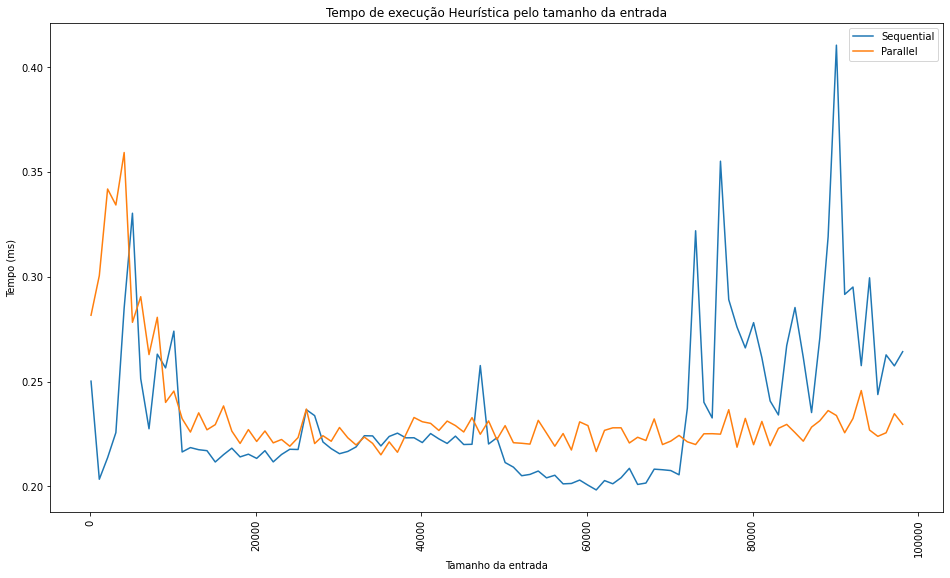

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 9))

plt.plot(sequential_size_list, sequential_time_list, label = 'Sequential')
plt.plot(parallel_size_list, parallel_time_list, label = 'Parallel')
plt.xlabel('Tamanho da entrada')
plt.ylabel('Tempo (ms)')
plt.xticks(rotation=90)
plt.legend()
plt.title('Tempo de execução Heurística pelo tamanho da entrada')
plt.show()

O gráfico mostra que para entradas pequenas não há um ganho significativo de tempo com a paralelização utilizando OpenMP, contudo, quando as entradas são substancialmente grandes observamos uma vantagem no uso do script paralelizado. Dessa forma podemos concluir que para grandes entradas a utilização de recursos de paralelização, nesse caso OpenMp, é um recurso útil para ter um ganho de speedup na resolução do problema.

### Análise GPU

In [20]:
time_list = []
size_list = []

for i in range(99):
    with open(f'Inputs/dna_seq_{i}.txt') as f:
        size_list.append(int(f.readlines()[0]))
        
        start = time.perf_counter()
        
        proc = subprocess.run(['../Projeto3/busca_exaustiva'], input=f.read(), text=True, capture_output=True)
        
        end = time.perf_counter()

        time_list.append(end - start)
        

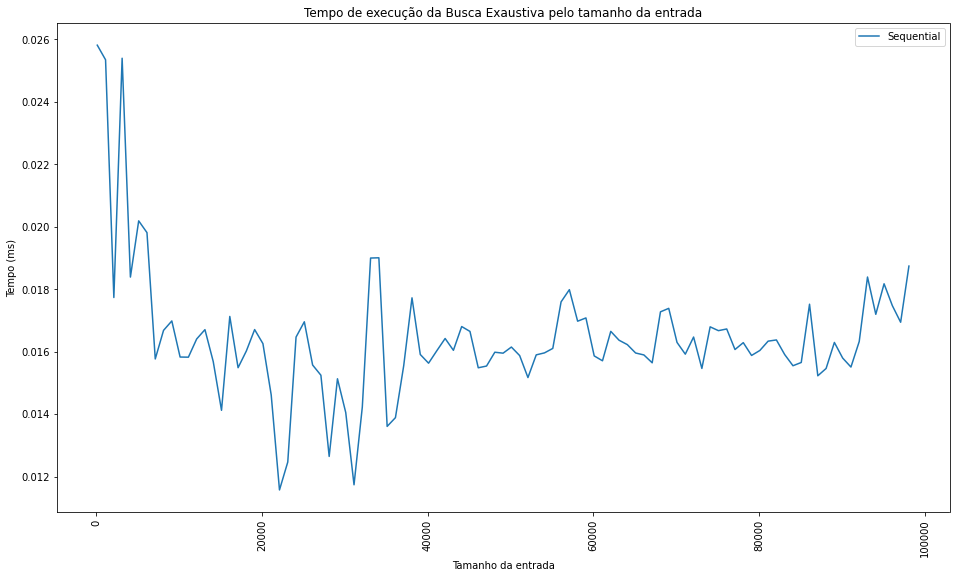

In [22]:
plt.figure(figsize = (16, 9))

plt.plot(size_list, time_list, label = 'Sequential')
plt.xlabel('Tamanho da entrada')
plt.ylabel('Tempo (ms)')
plt.xticks(rotation=90)
plt.legend()
plt.title('Tempo de execução da Busca Exaustiva pelo tamanho da entrada')
plt.show()

O gráfico mostra que há uma leve relação de crescimento do tempo de execução com o aumento da sequencia de entrada, contudo, há bastante ruído e muito provavelmente pois o real tempo de execução esteja sendo afetado pelo fato de estarmos calculando como tempo total o delta tempo da chamada do método *run* de *subprocess*. O tempo seria melhor calculado se fizéssemos esse calculo de tempo dentro do próprio processo *busca_exaustiva.cpp* adicionando a biblioteca chrono (`#include <chrono>`) e verificar o delta tempo de execução do main nos dois scripts com a função `chrono::high_resolution_clock::now()`. Outro pontos de melhora ocorreriam se eliminássemos também os prints que estão presentes no código original.

Com o intuito de diminuir o tempo de execução, seria necessário pensar numa maneira de reutilizar o mesmo for para evitar repetições e conseguir aproveitá-los para varrer as duas sequencias juntas. Outra maneira seria ao paralelizar o código.

Durante a implementação da paraleização do script da busca exaustiva levei em consideração o que eu havia feito no projeto 3 e tentei adaptar o código para que funcionasse.

Contudo, na minha implementação do projeto 3 eu utilizei matrizes para fazer o calculo dos scores. Essas matrizes 2D eram basicamente vetores de vetores de subsequencias, ou seja, as subsequencias de A e B ficavam armazenadas dentro de um vetor e cada subsequencia consiste num vetor de nucleotídios. E essas matrizes 2D contendo as subsequencias eram passadas para as funções de cáculo de score.

O problema que enfrentei foi enviar essas essas matrizes para a GPU. O funtor `w` que criei, que se baseia na função de calculo de score paralelo também `w`, compila sem nenhum problemas. Mas, na parte do código que as matrizes são acesssadas surge erros de compilação.

Não consegui solucionar esses erros a tempo da entrega, porém, resolvendo esses problemas o próximo passo seria paralelizar a função de smith-waterman para ter a a implementação da busca exaustiva completamente paralelizada na GPU.

E depois das provas pretendo solucionar esses problemas refatorando completamento o código inserindo os pontos comentados anteriormente.